In [3]:
#!pip install tensorflow==2.0.0-alpha0
#!pip install opencv-python
pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-2.0.0-py3-none-any.whl


SyntaxError: invalid syntax (<ipython-input-3-749ad48820ec>, line 3)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

#nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.5.0


## Importamos el dataset
Usaremos 60,000 imágenes para entrenar la red y 10,000 imágenes para evaluar con qué precisión aprendió la red para clasificar las imágenes. Podemos acceder al Fashion MNIST directamente desde TensorFlow. <br><br>Importamos y cargamos los datos de Fashion MNIST directamente desde TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

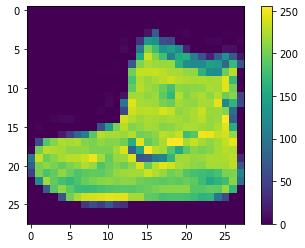

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Las etiquetas son una matriz de enteros, que van de 0 a 9. Estas corresponden a la clase de vestimenta que representa la imagen:


In [4]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

<br><br>
## Exploramos datos

In [5]:
train_images[0].shape

(28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_labels.shape

(10000,)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>
## Pre - Procesamiento de datos

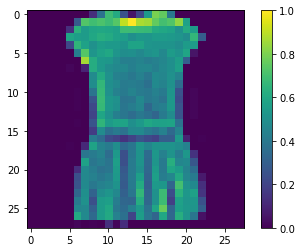

In [11]:
train_images = train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

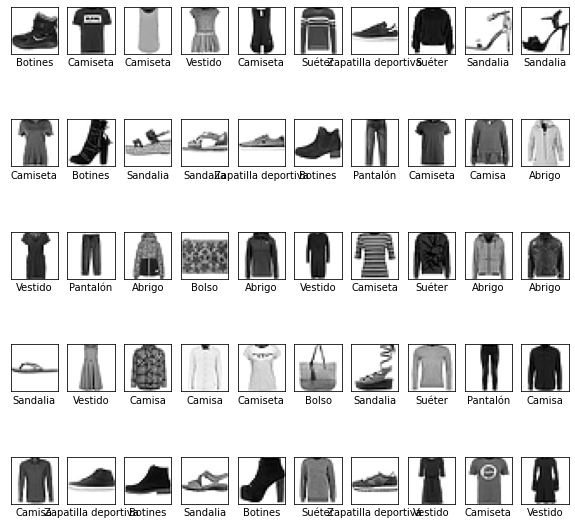

In [12]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<br><br>
## Configuramos la red neuronal
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               15100     
Total params: 132,850
Trainable params: 132,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

<br><br>
## En clasificación
### Target con codificación one hot tensorflow -> categorical_crossentropy
<br><br>
img1->    0   |  0   |   0   |   0   |   0   |   0   |  1   |   0   |  0   |   0 <br>
img2->    0   |  0   |   1   |   0   |   0   |   0   |  0   |   0   |  0   |   0 <br>

<img src="https://i.imgur.com/mtimFxh.png">
<br><br><br><br>

#### Target con enteros para representar categoría -> sparse_categorical_crossentropy
<br><br>
img1-> 2<br>
img2-> 6<br>
<br><br><br>
## En regresiónes 
### loss='mse'
<br><br><br>
## Optimizadores
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Comparación de Adam con otros algoritmos de optimización que entrenan a un perceptrón multicapa" >


In [17]:
checkpoint_path = "checkpoints/check";
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(train_images,
          train_labels, 
          epochs=50,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callbacks, tensorboard_callback])

# luego ejecuar en terminal 
# tensorboard --logdir logs/fit

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5239 - accuracy: 0.8198 - val_loss: 0.4390 - val_accuracy: 0.8422

Epoch 00001: saving model to checkpoints\check
Epoch 2/50
1875/1875 [==============================] - 2s 859us/step - loss: 0.3828 - accuracy: 0.8618 - val_loss: 0.4410 - val_accuracy: 0.8361

Epoch 00002: saving model to checkpoints\check
Epoch 3/50
1875/1875 [==============================] - 2s 847us/step - loss: 0.3402 - accuracy: 0.8765 - val_loss: 0.3528 - val_accuracy: 0.8719

Epoch 00003: saving model to checkpoints\check
Epoch 4/50
1875/1875 [==============================] - 2s 844us/step - loss: 0.3172 - accuracy: 0.8842 - val_loss: 0.3542 - val_accuracy: 0.8680

Epoch 00004: saving model to checkpoints\check
Epoch 5/50
1875/1875 [==============================] - 2s 861us/step - loss: 0.2971 - accuracy: 0.8903 - val_loss: 0.3542 - val_accuracy: 0.8726

Epoch 00005: saving model to checkpoints\check
Epoch 6/50
1875/1875 [==========

1875/1875 [==============================] - 2s 807us/step - loss: 0.1089 - accuracy: 0.9589 - val_loss: 0.4725 - val_accuracy: 0.8896

Epoch 00043: saving model to checkpoints\check
Epoch 44/50
1875/1875 [==============================] - 2s 819us/step - loss: 0.1072 - accuracy: 0.9603 - val_loss: 0.5015 - val_accuracy: 0.8827

Epoch 00044: saving model to checkpoints\check
Epoch 45/50
1875/1875 [==============================] - 2s 833us/step - loss: 0.1040 - accuracy: 0.9607 - val_loss: 0.4816 - val_accuracy: 0.8833

Epoch 00045: saving model to checkpoints\check
Epoch 46/50
1875/1875 [==============================] - 2s 819us/step - loss: 0.1032 - accuracy: 0.9615 - val_loss: 0.5107 - val_accuracy: 0.8819

Epoch 00046: saving model to checkpoints\check
Epoch 47/50
1875/1875 [==============================] - 2s 813us/step - loss: 0.1001 - accuracy: 0.9622 - val_loss: 0.4952 - val_accuracy: 0.8894

Epoch 00047: saving model to checkpoints\check
Epoch 48/50
1875/1875 [==============

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Precisión -> ", test_acc)

313/313 [==============================] - 0s 458us/step - loss: 0.4199 - accuracy: 0.8599
Precisión ->  0.8598999977111816


<br><br>
## Hagamos predicciones

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([1.5372646e-07, 1.2796767e-18, 4.8319617e-08, 7.8327027e-08,
       1.4792685e-09, 5.1534344e-03, 8.6972740e-08, 6.7942608e-03,
       4.8580614e-04, 9.8756599e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])


9

<br><br>
## Probemos el modelo con una imagen externa y ajena al dataset 
<br><br>
**Muy importante:**<br><br> La Imagen a comprobar debe ser ingresada luego de recibir el mismo procesamiento que recibieron las imágenes de entrenamiento

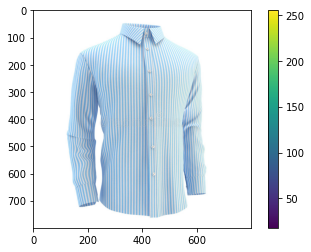

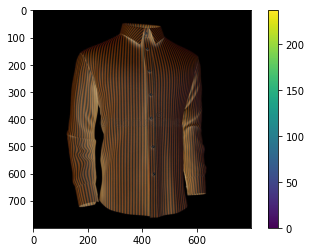

In [34]:
# cargamos una imagen a partir de una url

response = requests.get("https://thumbs.dreamstime.com/b/camisa-azul-en-un-fondo-blanco-45939451.jpg")
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

#invertimos la imagen
np_img = 255 - np_img

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
np_img.shape

(800, 800, 3)

In [36]:
# observamos que la imagen importada tiene 3 dimensiones, 
# porque es a color.
# por eso declaramos esta función para convertir la imagen a color a escala de grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [37]:
bw_image = rgb2gray(np_img)

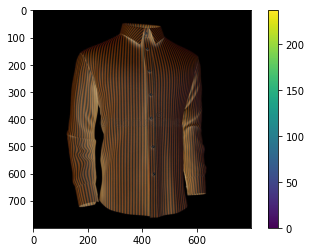

In [38]:
# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
bw_image.shape

(800, 800)

In [40]:
#ahora a la imagen en blanco y negro debemos redimensionarla a 28x28
res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

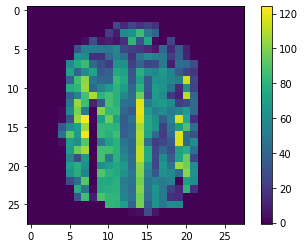

In [41]:
# mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

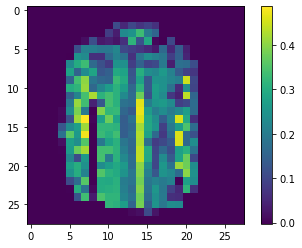

In [42]:
res = res / 255

# mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
x = np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [44]:
x[0] = np.array(res)

In [45]:
predictions = model.predict(x)
predictions[0]

array([6.7531146e-02, 1.4759746e-03, 2.1996553e-01, 1.6910821e-01,
       2.3435089e-01, 1.5385324e-04, 9.6388668e-02, 3.0465208e-07,
       2.1102540e-01, 2.2338198e-10], dtype=float32)

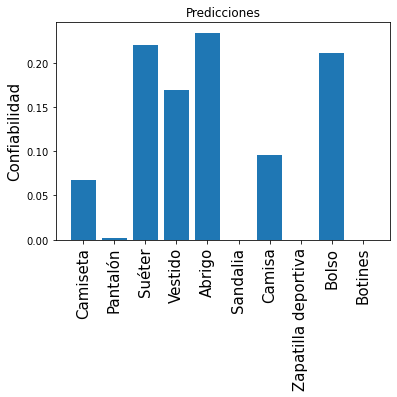

In [46]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

<br><br>
## Creamos un nuevo modelo y lo probamos antes de entrenarlo

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
loss, acc = model2.evaluate(test_images, test_labels)

In [ ]:
acc

### Como vemos el rendimiento es pésimo
### Cargamos los pesos grabados anteriormente y probamos nuevamente

In [ ]:
model2.load_weights(checkpoint_path)
loss, acc = model2.evaluate(test_images, test_labels)
acc